In [85]:
from util import *
from metrics import *
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [86]:
years = range(2009, 2019) # Don't include 2018 because many airports were added that weren't in the other years

In [146]:
graphs = []  # save as array of networks
for i in years:
    eval(f"graphs.append(create_graph(pd.read_csv('data/{i}_grouped.csv')))")  # use `eval` for automation

In [26]:
# for i in years: 
#     eval(f"viz_map(pd.read_csv('data/{i}_grouped.csv'), {i})")

In [27]:
# make graphs undirected and add up edges

# graphs = [to_undirected_graph(i) for i in graphs]

In [28]:
num_nodes = []
num_edges = []
for i in graphs:
    print(i)
    num_nodes.append(i.number_of_nodes())
    num_edges.append(i.number_of_edges())


# print(graphs[-2].nodes())
# print(graphs[-1].nodes())

main_list = list(set(graphs[-1].nodes()) - set(graphs[-2].nodes()))
print(main_list)

DiGraph with 296 nodes and 4619 edges
DiGraph with 305 nodes and 4622 edges
DiGraph with 299 nodes and 4528 edges
DiGraph with 312 nodes and 4646 edges
DiGraph with 319 nodes and 4730 edges
DiGraph with 325 nodes and 4738 edges
DiGraph with 322 nodes and 4696 edges
DiGraph with 313 nodes and 4591 edges
DiGraph with 318 nodes and 4776 edges
DiGraph with 356 nodes and 6361 edges
['LWB', 'BKG', 'SPN', 'PRC', 'SCK', 'OGS', 'SFB', 'LBF', 'FLO', 'ART', 'HVN', 'OGD', 'CMI', 'RFD', 'OWB', 'AZA', 'HHH', 'CYS', 'PVU', 'SMX', 'PGV', 'DBQ', 'HTS', 'CNY', 'DRT', 'STC', 'BFF', 'LBL', 'SLN', 'LYH', 'PIE', 'SHD', 'YNG', 'LCK', 'BLV', 'VEL', 'PSM', 'USA', 'HGR']


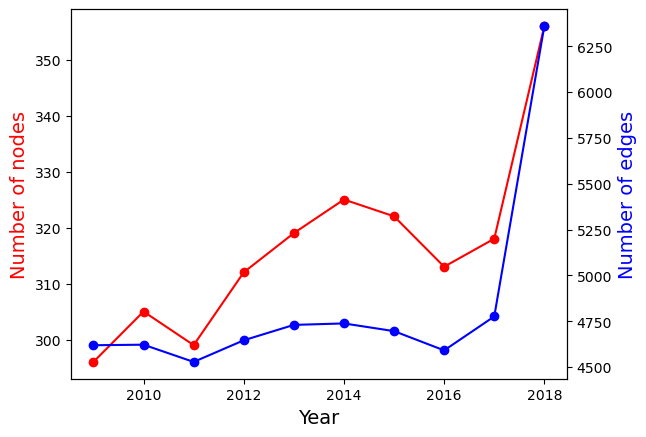

In [29]:
fig, ax = plt.subplots()
ax.plot(years, num_nodes, color="r")
ax.set_xlabel("Year", fontsize=14)
ax.scatter(years, num_nodes, color="r")
ax.set_ylabel("Number of nodes", color="red", fontsize=14)

ax2 = ax.twinx()
ax2.plot(years, num_edges, color="b")
ax2.scatter(years, num_edges, color="b")
ax2.set_ylabel("Number of edges", color="blue", fontsize=14)
plt.savefig(f"./images/nodes_edges.jpg", format="jpg", bbox_inches="tight")


In [30]:
mean_degree_list = []
for i in graphs:
    mean_degree_list.append(get_mean_degree(i))
    

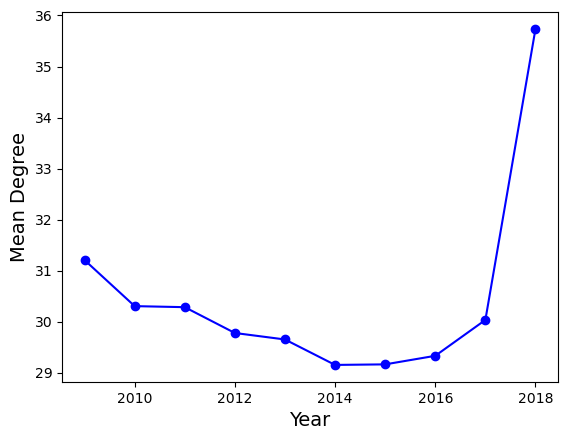

In [31]:
plt.plot(years, mean_degree_list, color="b")
plt.scatter(years, mean_degree_list, color="b")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Mean Degree", fontsize=14)
plt.savefig(f"./images/mean_degree.jpg", format="jpg", bbox_inches="tight")

In [32]:
# efficiency_list = []
# for i in graphs:
#     efficiency_list.append(calculate_network_efficiency(i))

In [33]:
# plt.plot(years, efficiency_list, color="b")
# plt.scatter(years, efficiency_list, color="b")
# plt.xlabel("Year", fontsize=14)
# plt.ylabel("Efficiency", fontsize=14)
# plt.savefig(f"./images/network_efficiency.jpg", format="jpg", bbox_inches="tight")

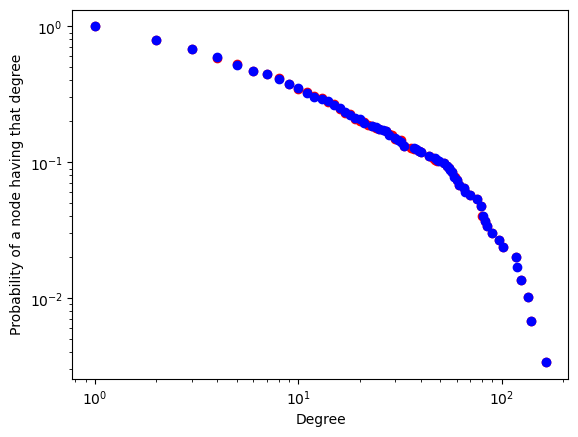

In [34]:
indeg_probs, outdeg_probs = analyze_degree_distribution(graphs[0])

# Plot the in-degree and out-degree distributions on log-log scales
plt.loglog(indeg_probs.keys(), indeg_probs.values(), 'ro')
plt.loglog(outdeg_probs.keys(), outdeg_probs.values(), 'bo')
plt.xlabel('Degree')
plt.ylabel('Probability of a node having that degree')
plt.savefig(f"./images/scale_free.jpg", format="jpg", bbox_inches="tight")




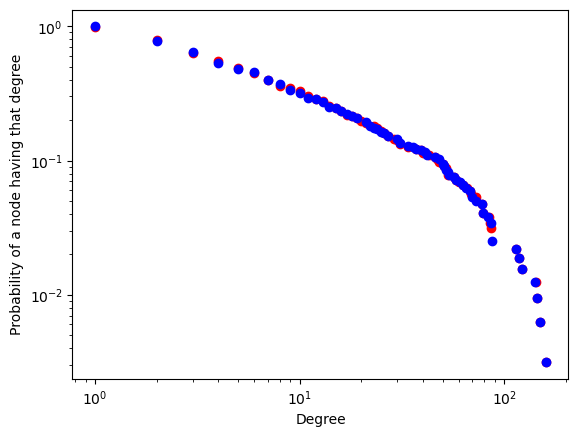

In [35]:
indeg_probs, outdeg_probs = analyze_degree_distribution(graphs[4])

# Plot the in-degree and out-degree distributions on log-log scales
plt.loglog(indeg_probs.keys(), indeg_probs.values(), 'ro')
plt.loglog(outdeg_probs.keys(), outdeg_probs.values(), 'bo')
plt.xlabel('Degree')
plt.ylabel('Probability of a node having that degree')
plt.show()

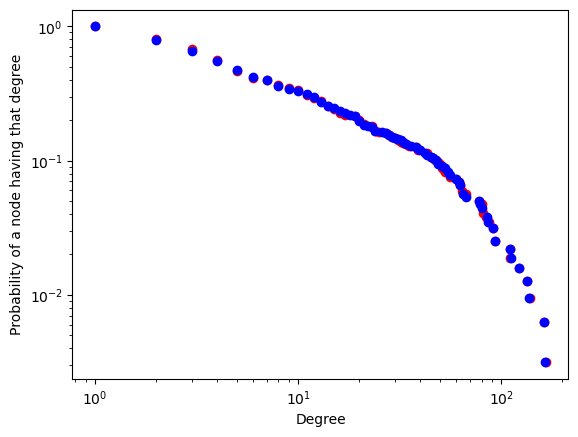

In [36]:
indeg_probs, outdeg_probs = analyze_degree_distribution(graphs[8])

# Plot the in-degree and out-degree distributions on log-log scales
plt.loglog(indeg_probs.keys(), indeg_probs.values(), 'ro')
plt.loglog(outdeg_probs.keys(), outdeg_probs.values(), 'bo')
plt.xlabel('Degree')
plt.ylabel('Probability of a node having that degree')
plt.show()

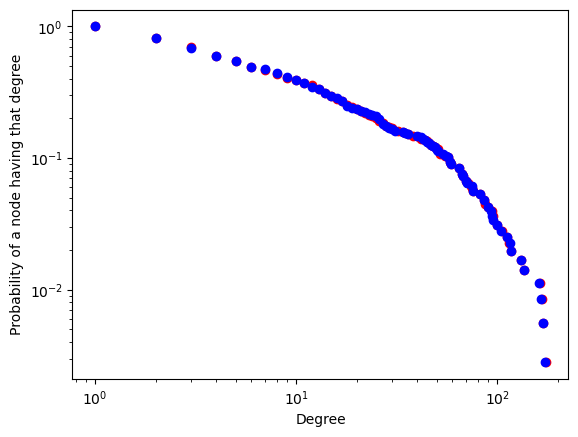

In [37]:
indeg_probs, outdeg_probs = analyze_degree_distribution(graphs[9])

# Plot the in-degree and out-degree distributions on log-log scales
plt.loglog(indeg_probs.keys(), indeg_probs.values(), 'ro')
plt.loglog(outdeg_probs.keys(), outdeg_probs.values(), 'bo')
plt.xlabel('Degree')
plt.ylabel('Probability of a node having that degree')
plt.show()

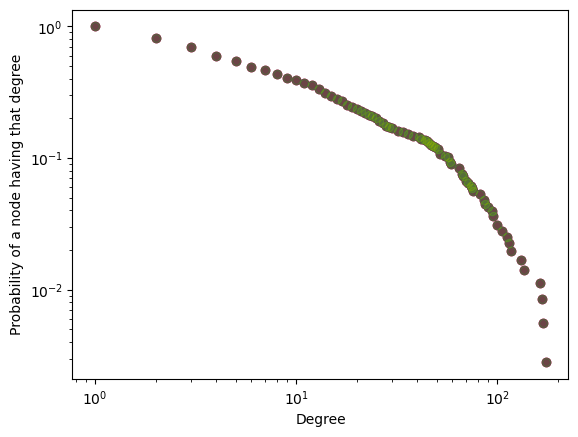

In [38]:
indeg_probs1, outdeg_probs1 = analyze_degree_distribution(graphs[0])

# Plot the in-degree and out-degree distributions on log-log scales
plt.loglog(indeg_probs.keys(), indeg_probs.values(), 'ro', alpha=1)
plt.xlabel('Degree')
plt.ylabel('Probability of a node having that degree')

indeg_probs2, outdeg_probs2 = analyze_degree_distribution(graphs[3])

# Plot the in-degree and out-degree distributions on log-log scales
plt.loglog(indeg_probs.keys(), indeg_probs.values(), 'bo', alpha=0.5)
plt.ylabel('Probability of a node having that degree')


indeg_probs3, outdeg_probs3 = analyze_degree_distribution(graphs[6])

# Plot the in-degree and out-degree distributions on log-log scales
plt.loglog(indeg_probs.keys(), indeg_probs.values(), 'go', alpha=0.3)
plt.ylabel('Probability of a node having that degree')

indeg_probs4, outdeg_probs4 = analyze_degree_distribution(graphs[9])

# Plot the in-degree and out-degree distributions on log-log scales
plt.loglog(indeg_probs.keys(), indeg_probs.values(), 'yo', alpha=0.2)
plt.ylabel('Probability of a node having that degree')
plt.show()

In [39]:
def average_betweenness_centrality(G):
    # Compute the betweenness centrality for each node in the graph
    betweenness_centralities_weighted = nx.betweenness_centrality(G, weight="num_of_flights")
    betweenness_centralities_unweighted = nx.betweenness_centrality(G)
    
    # Compute the average betweenness centrality, not normalized
    avg_betweenness_centrality_weighted = sum(betweenness_centralities_weighted.values()) / len(betweenness_centralities_weighted)
    
    # Compute the average betweenness centrality, normalized
    avg_betweenness_centrality_unweighted = sum(betweenness_centralities_unweighted.values()) / len(betweenness_centralities_unweighted)
    
    # Return the average betweenness centralities
    return avg_betweenness_centrality_weighted, avg_betweenness_centrality_unweighted


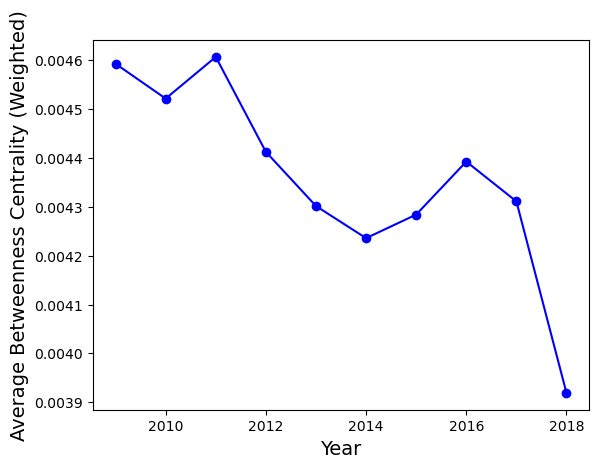

In [40]:
bc_weighted = []
bc_unweighted = []

for i in graphs:
    bc_weighted.append(average_betweenness_centrality(i)[0])
    bc_unweighted.append(average_betweenness_centrality(i)[1])

plt.plot(years, bc_unweighted, color="b")
plt.scatter(years, bc_unweighted, color="b")

plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Betweenness Centrality (Weighted)", fontsize=14)
plt.savefig(f"./images/betweenness_centrality_weighted.jpg", format="jpg", bbox_inches="tight")
    


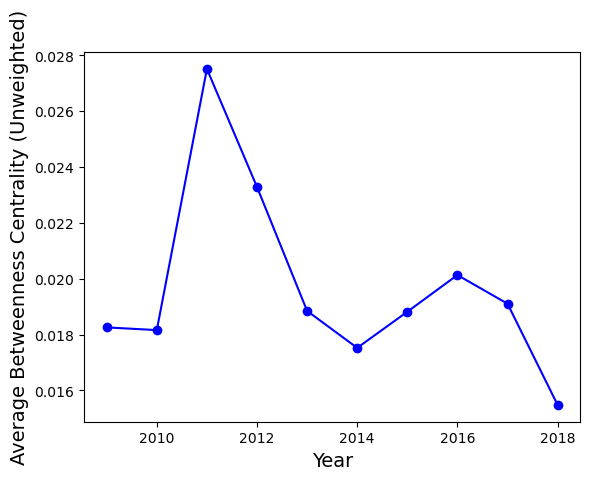

In [41]:
plt.plot(years, bc_weighted, color="b")
plt.scatter(years, bc_weighted, color="b")

plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Betweenness Centrality (Unweighted)", fontsize=14)
plt.savefig(f"./images/betweenness_centrality_unweighted.jpg", format="jpg", bbox_inches="tight")

In [58]:
import networkx as nx
from networkx.algorithms import betweenness_centrality, connected_components
import matplotlib.pyplot as plt

def plot_largest_connected_components(G):

    largest_components = []
    for x in range(1, 50):
        betweenness = nx.betweenness_centrality(G_copy)
        nodes_sorted_by_betweenness = sorted(betweenness, key=betweenness.get, reverse=True)
        nodes_to_remove = nodes_sorted_by_betweenness[:x]
        G_copy.remove_nodes_from(nodes_to_remove)
        connected_components = list(nx.connected_components(G_copy))
        if connected_components:
            largest_component = max(connected_components, key=len)
            largest_components.append(len(largest_component)/G.number_of_nodes())
        else:
            largest_components.append(0)
    plt.plot(range(1, 50), largest_components)
    plt.xlabel("Number of Nodes Removed")
    plt.ylabel("Size of Largest Connected Component")
    plt.show()


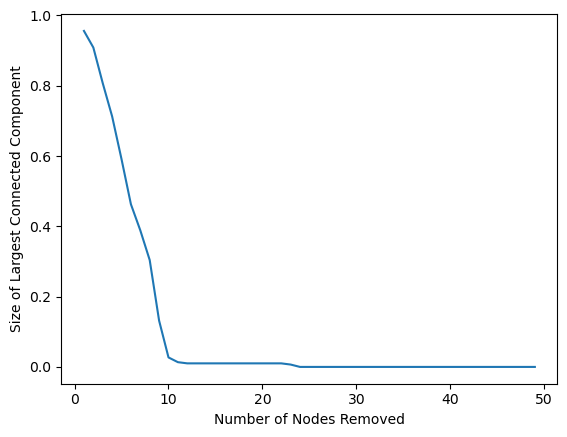

In [59]:
plot_largest_connected_components(to_undirected_graph(graphs[0]))

In [151]:
import networkx as nx
from networkx.algorithms import betweenness_centrality, connected_components
import matplotlib.pyplot as plt

def plot_largest_connected_components(G, nodes_removed=10, random=False):
    largest_components = []
    actuallyG_copy = [i.copy() for i in G]
    for G_copy in actuallyG_copy:
        num_nodes = G_copy.number_of_nodes()
        current_largest_components = []
        for x in range(1, nodes_removed):
            betweenness = nx.betweenness_centrality(G_copy)
            nodes_sorted_by_betweenness = sorted(betweenness, key=betweenness.get, reverse=True)
            nodes_to_remove = nodes_sorted_by_betweenness[:x]
            G_copy.remove_nodes_from(nodes_to_remove)
            connected_components = list(nx.connected_components(G_copy))
            if connected_components:
                largest_component = max(connected_components, key=len)
                current_largest_components.append(len(largest_component)/G_copy.number_of_nodes())
            else:
                current_largest_components.append(0)
        largest_components.append(current_largest_components)

    # plot the size of the largest connected component at each step for each graph
    for idx, largest_component in enumerate(largest_components):
        if idx == 0:
            plt.plot(range(1, nodes_removed), largest_component, label="2009")
        elif idx == 1:
            plt.plot(range(1, nodes_removed), largest_component, label="2013")
        else:
            plt.plot(range(1, nodes_removed), largest_component, label="2018")
        
    plt.legend()
    plt.xlabel("Number of Nodes Removed")
    plt.ylabel("Size of Largest Connected Component")
    plt.savefig(f"./images/targeted_attack.jpg", format="jpg", bbox_inches="tight")
    

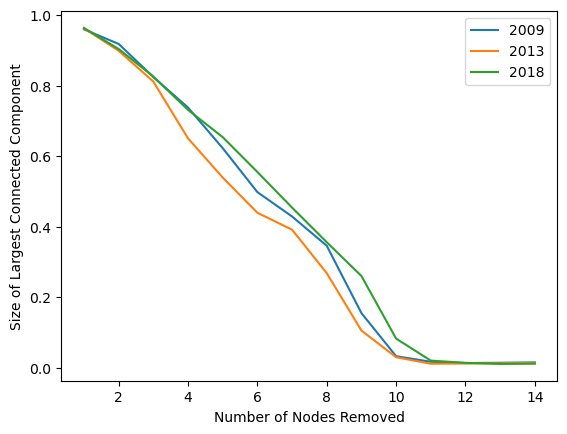

In [152]:
G_list = [to_undirected_graph(graphs[0]), to_undirected_graph(graphs[4]), to_undirected_graph(graphs[-1])]
plot_largest_connected_components(G_list, 15)

In [144]:
import networkx as nx
from networkx.algorithms import betweenness_centrality, connected_components
import matplotlib.pyplot as plt
import random

def plot_largest_connected_components_random(G, nodes_removed=10):
    largest_components = []
    actuallyG_copy = [i.copy() for i in G]
    for G_copy in actuallyG_copy:
        num_nodes = G_copy.number_of_nodes()
        current_largest_components = []
        for x in range(1, nodes_removed):
            nodes_to_remove = random.sample(G_copy.nodes(), x)
            G_copy.remove_nodes_from(nodes_to_remove)
            connected_components = list(nx.connected_components(G_copy))
            if connected_components:
                largest_component = max(connected_components, key=len)
                current_largest_components.append(len(largest_component)/G_copy.number_of_nodes())
            else:
                current_largest_components.append(0)
        largest_components.append(current_largest_components)

    # plot the size of the largest connected component at each step for each graph
    for idx, largest_component in enumerate(largest_components):
        if idx == 0:
            plt.plot(range(1, nodes_removed), largest_component, label="2009")
        elif idx == 1:
            plt.plot(range(1, nodes_removed), largest_component, label="2013")
        else:
            plt.plot(range(1, nodes_removed), largest_component, label="2018")
        
       
        

    plt.xlabel("Number of Nodes Removed")
    plt.ylabel("Size of Largest Connected Component")
    plt.legend()
    plt.show()

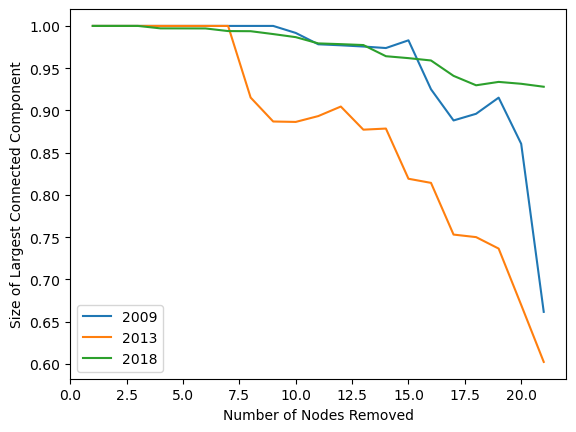

In [145]:
plot_largest_connected_components_random(G_list, 22)

In [128]:
print(G_list)

[<networkx.classes.graph.Graph object at 0x00000211122F9E20>, <networkx.classes.graph.Graph object at 0x00000211122F9F10>, <networkx.classes.graph.Graph object at 0x00000211122F9A00>]


In [120]:
print(G_list[1])

Graph with 319 nodes and 2399 edges


In [133]:
import networkx as nx
from networkx.algorithms import betweenness_centrality, connected_components
import matplotlib.pyplot as plt

def plot_largest_connected_components_reverse(G, nodes_removed=10, random=False):
    largest_components = []
    actuallyG_copy = [i.copy() for i in G]
    for G_copy in actuallyG_copy:
        num_nodes = G_copy.number_of_nodes()
        current_largest_components = []
        for x in range(1, nodes_removed):
            betweenness = nx.betweenness_centrality(G_copy)
            nodes_sorted_by_betweenness = sorted(betweenness, key=betweenness.get, reverse=False)
            nodes_to_remove = nodes_sorted_by_betweenness[:x]
            G_copy.remove_nodes_from(nodes_to_remove)
            connected_components = list(nx.connected_components(G_copy))
            if connected_components:
                largest_component = max(connected_components, key=len)
                current_largest_components.append(len(largest_component)/G_copy.number_of_nodes())
            else:
                current_largest_components.append(0)
        largest_components.append(current_largest_components)

    # plot the size of the largest connected component at each step for each graph
    for idx, largest_component in enumerate(largest_components):
        plt.plot(range(1, nodes_removed), largest_component, label=idx)
        

    plt.xlabel("Number of Nodes Removed")
    plt.ylabel("Size of Largest Connected Component")
    plt.legend()
    plt.show()

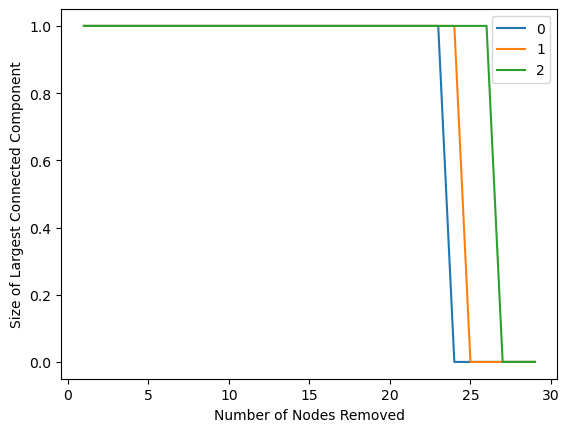

In [136]:
plot_largest_connected_components_reverse(G_list, 30)